# Walmart Business Case Study - Confidence Interval and CLT

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

- User_ID    :	User ID
- Product_ID :	Product ID
- Gender     :	Sex of User
- Age        :	Age in bins
- Occupation :	Occupation(Masked)
- City_Category         :	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status        :	Marital Status
- ProductCategory       :	Product Category (Masked)
- Purchase              :	Purchase Amount

**Importing required packages**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import NaN, nan, NAN
import warnings
warnings.filterwarnings("ignore")

**Loading data into Dataframe**

In [15]:
walmart_df = pd.read_csv('data/walmart_data.csv')
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [16]:
walmart_df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [17]:
walmart_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [18]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [19]:
walmart_df.isnull().sum()/len(walmart_df) *100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [20]:
walmart_df['User_ID'].nunique()

5891

In [21]:
walmart_df.groupby(['Gender'])['User_ID'].nunique()/walmart_df['User_ID'].nunique() * 100

Gender
F    28.280428
M    71.719572
Name: User_ID, dtype: float64

In [22]:
walmart_df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


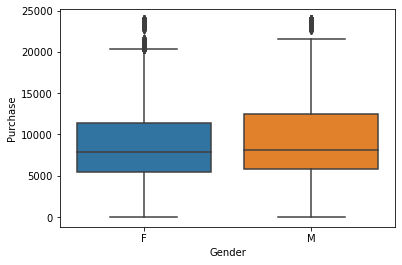

In [23]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = walmart_df)
plt.show()

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

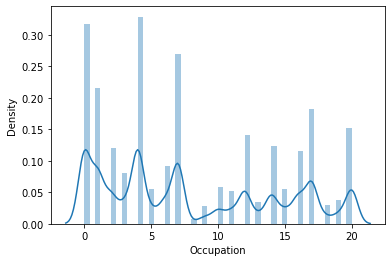

In [24]:
sns.distplot(walmart_df['Occupation'])

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

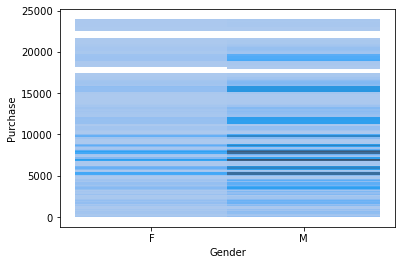

In [25]:
sns.histplot(data = walmart_df, x = 'Gender', y = 'Purchase')